# Pacotes

In [ ]:
# Instalando o Tensor Flow

!pip install tensorflow -q

# 1 - Rede Neural Básica


##  1.1 Carregando os dados - Banco Imagens Projeto 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


# 1.2 Definição dos bancos de treino,teste, e validação. 


In [ ]:
from tensorflow import keras
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np


img_height = 200
img_width = 200

treino = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/2022/FLS6497/FLS6497-ML/mapas/treino',
    labels='inferred',
    seed=44,
    image_size=(img_height, img_width),
    batch_size=32,
)

validacao = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/2022/FLS6497/FLS6497-ML/mapas/validacao',
    labels='inferred',
    seed=44,
    image_size=(img_height, img_width),
    batch_size=32,
)

teste = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/2022/FLS6497/FLS6497-ML/mapas/teste',
    labels='inferred',
    seed=44,
    image_size=(img_height, img_width),
    batch_size=32,
)


# Batch size alterado para 32 (anteriormente 64), por conta de melhora nos resultados do modelo. 




Found 4000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Alteramos o batch size do preprocessamento das imagens pois isso fez o modelo apresentar uma melhora nas métricas de performance.

In [ ]:
# Checando o tipo resultante dos bancos

print(type(treino))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
# Checando as categorias da classificação e se os formatos das imagens estão corretos

for data, labels in treino.take(1):
  print(data.shape)
  print(labels.shape)

(32, 200, 200, 3)
(32,)


In [ ]:
class_names = treino.class_names
print(class_names)


['rural', 'urbano']


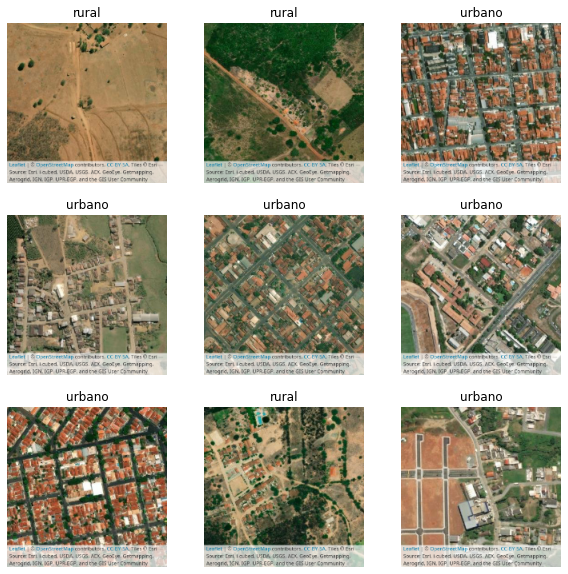

In [ ]:
import matplotlib.pyplot as plt


# Verificando se está tudo certo com o banco
plt.figure(figsize=(10, 10))
for images, labels in treino.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# GPU do colab

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

elif device_name == '/device:GPU:0':
  print("GPU disponível")




GPU disponível


## Treinando o modelo baseline e avaliando seus resultados

In [ ]:
from tensorflow.keras import layers

# Garantindo que estamos usando a GPU
with tf.device('/device:GPU:0'):
  # Definindo a arquitetura do modelo
  model = keras.models.Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Flatten(),
      layers.Dense(32,
                   activation="relu"),
      layers.Dense(1, activation="sigmoid")
  ])

  # Compila o Modelo
  model.compile(optimizer="adam", 
                loss="binary_crossentropy", 
                metrics=["accuracy","Precision", "Recall"])

  # Treina o modelo
  model.fit(treino,
            epochs=10, 
            validation_data=validacao)



Epoch 1/10
125/125 [==============================] - 27s 196ms/step - loss: 1.2389 - accuracy: 0.7003 - precision: 0.7232 - recall: 0.9500 - val_loss: 0.6704 - val_accuracy: 0.7740 - val_precision: 0.7740 - val_recall: 1.0000
Epoch 2/10
125/125 [==============================] - 26s 199ms/step - loss: 0.6645 - accuracy: 0.7247 - precision: 0.7247 - recall: 1.0000 - val_loss: 0.6451 - val_accuracy: 0.7740 - val_precision: 0.7740 - val_recall: 1.0000
Epoch 3/10
125/125 [==============================] - 26s 195ms/step - loss: 0.6465 - accuracy: 0.7247 - precision: 0.7247 - recall: 1.0000 - val_loss: 0.6243 - val_accuracy: 0.7740 - val_precision: 0.7740 - val_recall: 1.0000
Epoch 4/10
125/125 [==============================] - 26s 194ms/step - loss: 0.6322 - accuracy: 0.7247 - precision: 0.7247 - recall: 1.0000 - val_loss: 0.6074 - val_accuracy: 0.7740 - val_precision: 0.7740 - val_recall: 1.0000
Epoch 5/10
125/125 [==============================] - 26s 194ms/step - loss: 0.6210 - accura

In [ ]:
# Salvando os resultados do modelo para verificação dos resultados por epoch.

epochs=10
history = model.fit(
  treino,
  validation_data=treino,
  epochs=epochs,
  verbose = 0
)

In [ ]:
# Output do modelo até o momento

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                3840032   
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,840,065
Trainable params: 3,840,065
Non-trainable params: 0
_________________________________________________________________


## Visualizando os dados do treinamento

### Accuracy

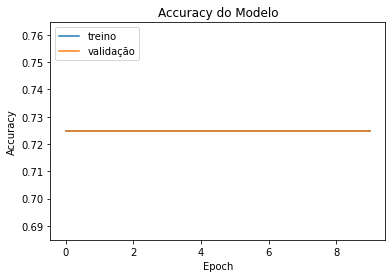

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()


### Loss

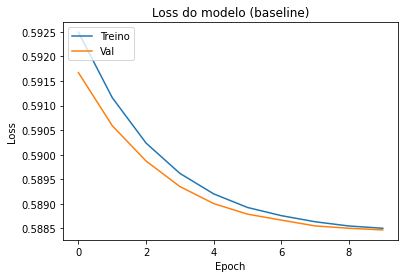

In [ ]:
# Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do modelo (baseline)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

### Validação no banco de Teste

In [ ]:
# Avaliando o modelo no dataset de teste

model.evaluate(teste)

16/16 [==============================] - 3s 85ms/step - loss: 0.6345 - accuracy: 0.6760 - precision: 0.6760 - recall: 1.0000


[0.6344889998435974, 0.6759999990463257, 0.6759999990463257, 1.0]

Observa-se que, apesar do aumento do número de épocas, não há ganhos reais na validação. Portanto, os próximos modelos utilizarão 10 épocas como padrão.

## *Tuning* dos hiperparâmetros (Rede Neural Simples)

:Nessa parte, para facilitar a escolha dos hiperparâmetros, seguimos este [tutorial](https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/) e outro do [site](https://keras.io/guides/keras_tuner/custom_tuner/) oficial do Keras para automatizar esse processo.

Outros Links: [1](https://github.com/keras-team/keras-tuner/issues/122)
[2](https://keras.io/guides/keras_tuner/getting_started/#tune-model-training)

In [ ]:
!pip install keras_tuner -q

     |████████████████████████████████| 135 kB 7.8 MB/s 
     |████████████████████████████████| 1.6 MB 54.2 MB/s 


Como a acurácia não mudou ao longo das epochs no último modelo, vamos alterar o otimizador para ver se há alguma mudança no resultado. Além disso, deixamos para o hyper_tuner decidir se algumas camadas devem ser adicionadas ou não (camada de *dropout*) e os valores das unidades e tipo de ativação para as camadas densas. O modo de escolha foi o *Random Search*.

In [ ]:
import keras_tuner
from tensorflow.keras import layers
from keras.optimizers import SGD


# Criando a classe do hypermodel
class MyHyperModel(keras_tuner.HyperModel):
  
    def build(self, hp):
      # Arquitetura do Modelo
        model = keras.Sequential()

        # Rescale

        model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

        # Camada Flatten

        model.add(layers.Flatten())
        # 1° Camada Densa com tuning
        model.add(
            layers.Dense(
                units= hp.Int("units",
                              min_value=32,
                              max_value=512,
                              step=32), # Deixar o tuner decidir o número de unidades
                activation= hp.Choice("activation", ["relu", "tanh"]), # E o modo de ativação
            )
        )
        # Decidir se deve ou não usar dropout antes da camada de output
        if hp.Boolean("dropout"):
          model.add(layers.Dropout(rate=0.25))


        # Camada Densa final de output com 1 classes
        model.add(layers.Dense(1, # N° de Classes
                               activation="sigmoid") # Sigmoid é melhor para binário
                               )
        

        # Definindo os valores para a decisão do learning rate

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate), # Alteramos o otimizador para ver se isso gera melhoras
            loss="binary_crossentropy", 
            metrics=["accuracy", "Precision", "Recall"],
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tunando o batch size
            batch_size=hp.Int("batch_size", min_value = 16,
                              max_value = 128,
                              step = 16),
            **kwargs,
        )

tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=5, # Aumentamos o número de trials para 5 por causa do space size
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

### Hypertuning de fato

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Rodando os trials

In [ ]:
# Parando os trials antes do tempo

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform hypertuning
tuner.search(treino,
             epochs=5, # Menor número de epochs mas mais trials 
             validation_data=validacao,
             callbacks=[stop_early])

Trial 5 Complete [00h 02m 42s]
val_accuracy: 0.7960000038146973

Best val_accuracy So Far: 0.7979999780654907
Total elapsed time: 00h 14m 16s


Resultados do Tuning

In [ ]:
# Melhores hiperparâmetros

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

# Melhor Modelo

best_model = tuner.get_best_models()[0]
best_model.summary()

{'units': 256, 'activation': 'tanh', 'dropout': False, 'learning_rate': 0.001, 'batch_size': 16}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 256)               30720256  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30,720,513
Trainable params: 30,720,513
Non-trainable params: 0
_________________________________________________________________


# Vendo os resultados no banco de validação

In [ ]:
best_model.fit(treino,
             epochs=1, 
             validation_data=validacao)

125/125 [==============================] - 27s 196ms/step - loss: 0.4689 - accuracy: 0.7865 - precision: 0.8044 - recall: 0.9320 - val_loss: 0.4629 - val_accuracy: 0.7820 - val_precision: 0.7884 - val_recall: 0.9819


# Repetir os resultados em 10 epochs

Vamos rodar o modelo em 10 epochs e analisar os resultados.

In [ ]:
history = best_model.fit(treino,
             epochs=10, 
             validation_data=validacao,
             verbose = 0)

### Accuracy

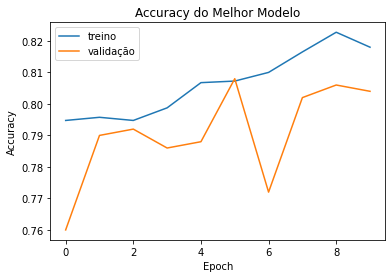

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Melhor Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Loss

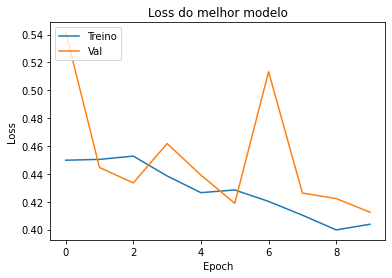

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do melhor modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

### Avaliando no banco de teste

In [ ]:
best_model.fit(treino,
             epochs=5, 
             validation_data=validacao)



# Avaliando o modelo no dataset de teste

best_model.evaluate(teste)

Epoch 1/5
125/125 [==============================] - 26s 195ms/step - loss: 0.4104 - accuracy: 0.8145 - precision: 0.8376 - recall: 0.9231 - val_loss: 0.4363 - val_accuracy: 0.8000 - val_precision: 0.8615 - val_recall: 0.8837
Epoch 2/5
125/125 [==============================] - 26s 200ms/step - loss: 0.3962 - accuracy: 0.8260 - precision: 0.8435 - recall: 0.9331 - val_loss: 0.5328 - val_accuracy: 0.7540 - val_precision: 0.9204 - val_recall: 0.7468
Epoch 3/5
125/125 [==============================] - 26s 199ms/step - loss: 0.3969 - accuracy: 0.8167 - precision: 0.8406 - recall: 0.9220 - val_loss: 0.4388 - val_accuracy: 0.7960 - val_precision: 0.8740 - val_recall: 0.8605
Epoch 4/5
125/125 [==============================] - 29s 220ms/step - loss: 0.4011 - accuracy: 0.8225 - precision: 0.8447 - recall: 0.9251 - val_loss: 0.4173 - val_accuracy: 0.8020 - val_precision: 0.8130 - val_recall: 0.9664
Epoch 5/5
16/16 [==============================] - 3s 88ms/step - loss: 0.4939 - accuracy: 0.756

[0.49392539262771606,
 0.7559999823570251,
 0.747706413269043,
 0.9644970297813416]

Com as mudanças do hypertuning, melhoramos a acurácia do modelo de rede neural simples de 67% para 75%.

# 2 - Rede neural convolucional



Iremos direto para o hypertuning do modelo convolucional e avaliação de seus resultados. Neste, adicionamos mais camadas do que o exemplo em aula e deixamos o hypertuner decidir principalmente se as camadas de dropout devem ou não existir.


In [ ]:
class ConvHyperModel(keras_tuner.HyperModel):
  # Criando a classe do hypermodel
    def build(self, hp):
      # Arquitetura do Modelo
        model = keras.Sequential()

        # Rescale

        model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

        # 1° Camada Convolucional
        
        model.add(layers.Conv2D(32,
                                kernel_size=(3, 3), 
                                activation='relu'))

        # 1° Pooling
        model.add(layers.MaxPooling2D((2, 2)))

        # 1° Dropout
        if hp.Boolean("dropout1"):
          model.add(layers.Dropout(rate=0.2))

        # 2° Camada Convolucional        
        model.add(layers.Conv2D(64, 
                                kernel_size=(3, 3), 
                                activation='relu'))
        
        # 2° Pooling
        model.add(layers.MaxPooling2D((2, 2)))

        # 2° Dropout

        model.add(layers.Dropout(rate=0.3))


        # 3° Camada Convolucional
        model.add(layers.Conv2D(128,
                                kernel_size=(3, 3),
                                activation='relu'))
        

        # 3° Dropout
        if hp.Boolean("dropout2"):
          model.add(layers.Dropout(rate=0.4))

        # Flatten
        model.add(layers.Flatten())


        # Dense
        model.add(layers.Dense(128, activation = "relu"))
        

        # 4° Dropout
        if hp.Boolean("dropout3"):
          model.add(layers.Dropout(rate=0.3))

        
        # Camada densa final

        model.add(layers.Dense(1, activation='sigmoid'))
      
        
        # Definindo os valores para a decisão do learning rate
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss="binary_crossentropy", 
            metrics=["accuracy", "Precision", "Recall"],
        )
        return model



    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tunando o batch size
            batch_size=hp.Int("batch_size", min_value = 16,
                              max_value = 128,
                              step = 16),
            **kwargs,
        )

tuner = keras_tuner.RandomSearch(
    ConvHyperModel(),
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Parando os trials antes do tempo

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform hypertuning
tuner.search(treino,
             epochs=5, 
             validation_data=validacao,
             callbacks=[stop_early])

Trial 5 Complete [00h 01m 53s]
val_accuracy: 0.7739999890327454

Best val_accuracy So Far: 0.8880000114440918
Total elapsed time: 00h 13m 03s


In [ ]:
# Melhores hiperparâmetros

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

# Melhor Modelo

best_model = tuner.get_best_models()[0]
best_model.summary()

{'dropout': False, 'learning_rate': 0.001, 'batch_size': 32}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                             

In [ ]:
best_model.fit(treino,
             epochs=1, 
             validation_data=validacao)

125/125 [==============================] - 31s 233ms/step - loss: 0.2534 - accuracy: 0.8932 - precision: 0.9283 - recall: 0.9241 - val_loss: 0.3024 - val_accuracy: 0.8520 - val_precision: 0.9433 - val_recall: 0.8605


## Repetindo os resultados em 10 epochs

In [ ]:
history = best_model.fit(treino,
             epochs=10, 
             validation_data=validacao)

Epoch 1/10
125/125 [==============================] - 31s 240ms/step - loss: 0.2199 - accuracy: 0.9090 - precision: 0.9436 - recall: 0.9300 - val_loss: 0.3603 - val_accuracy: 0.8360 - val_precision: 0.9395 - val_recall: 0.8424
Epoch 2/10
125/125 [==============================] - 27s 204ms/step - loss: 0.1566 - accuracy: 0.9413 - precision: 0.9661 - recall: 0.9524 - val_loss: 0.4417 - val_accuracy: 0.8380 - val_precision: 0.8864 - val_recall: 0.9070
Epoch 3/10
125/125 [==============================] - 27s 205ms/step - loss: 0.1186 - accuracy: 0.9563 - precision: 0.9756 - recall: 0.9638 - val_loss: 0.5328 - val_accuracy: 0.8140 - val_precision: 0.9106 - val_recall: 0.8424
Epoch 4/10
125/125 [==============================] - 27s 204ms/step - loss: 0.0964 - accuracy: 0.9645 - precision: 0.9822 - recall: 0.9686 - val_loss: 0.4628 - val_accuracy: 0.8240 - val_precision: 0.9030 - val_recall: 0.8656
Epoch 5/10
125/125 [==============================] - 27s 204ms/step - loss: 0.0590 - accura

### Accuracy

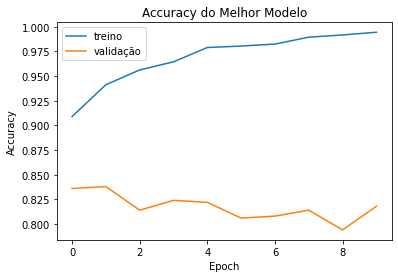

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Melhor Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Precision

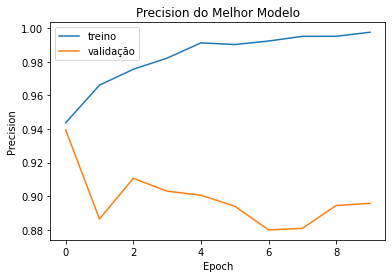

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision do Melhor Modelo')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Recall

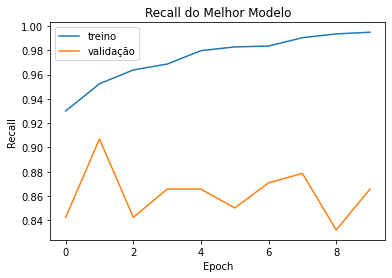

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall do Melhor Modelo')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Loss

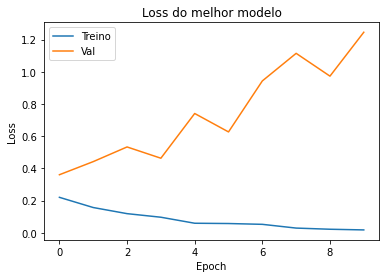

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do melhor modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Avaliando o modelo no dataset de teste

best_model.evaluate(teste)

16/16 [==============================] - 4s 105ms/step - loss: 1.4617 - accuracy: 0.8260 - precision: 0.8702 - recall: 0.8728


[1.461735725402832, 0.8259999752044678, 0.8702064752578735, 0.8727810382843018]

Conseguimos uma melhora de 75% para 82,6%. Iremos testar algumas configurações diferentes, como data augmentation e adicionar uma camada de dropout após a penúltima camada densa.


# Data augmentation (Rede Neural Convolucional).

Vamos aplicar a técnica de data augmentation e gerar novas observações por meio de rotações, zoom e giros horizontais das imagens originais, performados de forma aleatória. 

In [ ]:

# Definição do método de data augmentation.

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

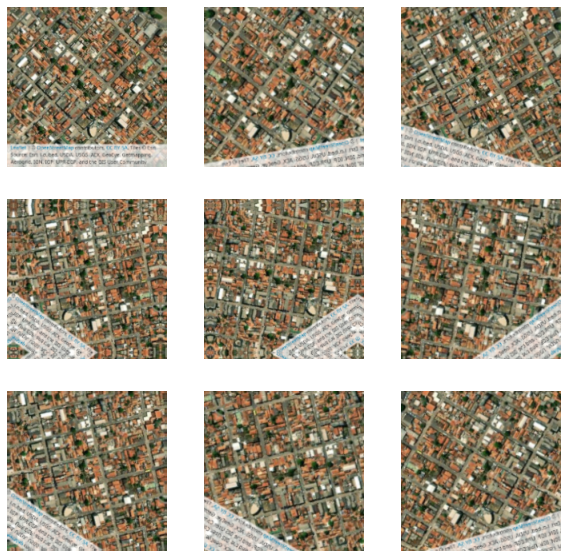

In [ ]:
# Plotando exemplos de possíveis gerações de imagens

plt.figure(figsize=(10, 10))

for images, labels in treino.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, 
                                         training = True) # Necessário pois sem isso não funcionava
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# Definindo a classe do modelo convolucional com data augmentation

class ConvHyperModel2(keras_tuner.HyperModel):
  # Criando a classe do hypermodel
    def build(self, hp):
      # Arquitetura do Modelo
        model = keras.Sequential()

        # Data Augmentation

        model.add(data_augmentation)

        # Rescale

        model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

        # 1° Camada Convolucional
        
        model.add(layers.Conv2D(32,
                                kernel_size=(3, 3), 
                                activation='relu'))

        # 1° Pooling
        model.add(layers.MaxPooling2D((2, 2)))

        # 1° Dropout
        if hp.Boolean("dropout1",
                      default = True):
          model.add(layers.Dropout(rate=0.2))

        # 2° Camada Convolucional        
        model.add(layers.Conv2D(64, 
                                kernel_size=(3, 3), 
                                activation='relu'))
        
        # 2° Pooling
        model.add(layers.MaxPooling2D((2, 2)))

        # 2° Dropout

        model.add(layers.Dropout(rate=0.3))


        # 3° Camada Convolucional
        model.add(layers.Conv2D(128,
                                kernel_size=(3, 3),
                                activation='relu'))
        

        # 3° Dropout
        if hp.Boolean("dropout3",
                      default = True):
          model.add(layers.Dropout(rate=0.4))

        # Flatten
        model.add(layers.Flatten())


        # Dense
        model.add(layers.Dense(128, activation = "relu"))
        

        # 4° Dropout
        model.add(layers.Dropout(rate=0.3))

        
        # Camada densa final

        model.add(layers.Dense(1, activation='sigmoid'))
      
        
        # Definindo os valores para a decisão do learning rate
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss="binary_crossentropy", 
            metrics=["accuracy", "Precision", "Recall"],
        )
        return model



    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tunando o batch size
            batch_size=hp.Int("batch_size", min_value = 16,
                              max_value = 128,
                              step = 16),
            **kwargs,
        )

tuner = keras_tuner.RandomSearch(
    ConvHyperModel2(),
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 3
dropout1 (Boolean)
{'default': True, 'conditions': []}
dropout3 (Boolean)
{'default': True, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Parando os trials antes do tempo

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform hypertuning
tuner.search(treino,
             epochs=10, 
             validation_data=validacao,
             callbacks=[stop_early])

Trial 5 Complete [00h 02m 11s]
val_accuracy: 0.7739999890327454

Best val_accuracy So Far: 0.8939999938011169
Total elapsed time: 00h 25m 51s


In [ ]:
# Melhores hiperparâmetros

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

# Melhor Modelo

best_model = tuner.get_best_models()[0]
best_model.summary()

{'dropout1': False, 'dropout3': False, 'learning_rate': 0.0001, 'batch_size': 16}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48,

In [ ]:
best_model.fit(treino,
             epochs=1, 
             validation_data=validacao)

125/125 [==============================] - 31s 230ms/step - loss: 0.3033 - accuracy: 0.8708 - precision: 0.9084 - recall: 0.9138 - val_loss: 0.2410 - val_accuracy: 0.8860 - val_precision: 0.9275 - val_recall: 0.9251


## Repetindo os resultados em 10 epochs

In [ ]:
history = best_model.fit(treino,
             epochs=10, 
             validation_data=validacao)

Epoch 1/10
125/125 [==============================] - 30s 229ms/step - loss: 0.3011 - accuracy: 0.8675 - precision: 0.9022 - recall: 0.9165 - val_loss: 0.2742 - val_accuracy: 0.8800 - val_precision: 0.8921 - val_recall: 0.9612
Epoch 2/10
125/125 [==============================] - 31s 239ms/step - loss: 0.3039 - accuracy: 0.8630 - precision: 0.8994 - recall: 0.9131 - val_loss: 0.2553 - val_accuracy: 0.8780 - val_precision: 0.9075 - val_recall: 0.9380
Epoch 3/10
125/125 [==============================] - 34s 258ms/step - loss: 0.2988 - accuracy: 0.8698 - precision: 0.9061 - recall: 0.9151 - val_loss: 0.2416 - val_accuracy: 0.8940 - val_precision: 0.9639 - val_recall: 0.8966
Epoch 4/10
125/125 [==============================] - 30s 227ms/step - loss: 0.2933 - accuracy: 0.8750 - precision: 0.9123 - recall: 0.9155 - val_loss: 0.2298 - val_accuracy: 0.9000 - val_precision: 0.9616 - val_recall: 0.9070
Epoch 5/10
125/125 [==============================] - 30s 229ms/step - loss: 0.2940 - accura

### Accuracy

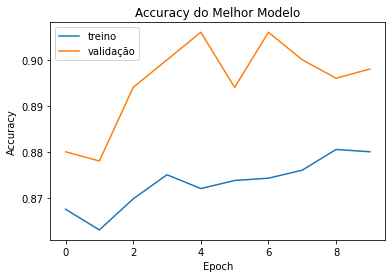

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Melhor Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Loss

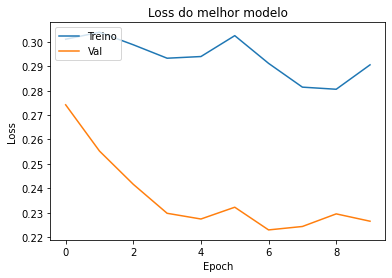

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do melhor modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

### Precision

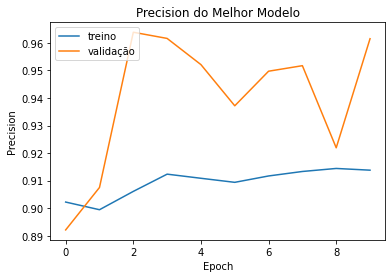

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision do Melhor Modelo')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Recall

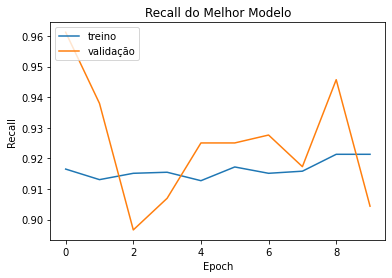

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall do Melhor Modelo')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

### Avaliando no banco de Teste

O modelo tem o melhor resultado em 5 épocas, ele será retreinado e testado no banco de teste

In [ ]:
best_model.fit(treino,
             epochs=5, 
             validation_data=validacao)


print(" ")
print("Avaliando no banco de Teste")
best_model.evaluate(teste)

Epoch 1/5
125/125 [==============================] - 30s 222ms/step - loss: 0.2744 - accuracy: 0.8838 - precision: 0.9162 - recall: 0.9241 - val_loss: 0.2080 - val_accuracy: 0.9100 - val_precision: 0.9572 - val_recall: 0.9251
Epoch 2/5
125/125 [==============================] - 29s 222ms/step - loss: 0.2705 - accuracy: 0.8890 - precision: 0.9243 - recall: 0.9224 - val_loss: 0.2239 - val_accuracy: 0.9020 - val_precision: 0.9268 - val_recall: 0.9483
Epoch 3/5
125/125 [==============================] - 33s 251ms/step - loss: 0.2699 - accuracy: 0.8865 - precision: 0.9202 - recall: 0.9234 - val_loss: 0.2118 - val_accuracy: 0.9040 - val_precision: 0.9593 - val_recall: 0.9147
Epoch 4/5
125/125 [==============================] - 33s 248ms/step - loss: 0.2732 - accuracy: 0.8870 - precision: 0.9197 - recall: 0.9248 - val_loss: 0.2094 - val_accuracy: 0.9160 - val_precision: 0.9576 - val_recall: 0.9328
Epoch 5/5
125/125 [==============================] - 32s 244ms/step - loss: 0.2658 - accuracy: 0

[0.26496103405952454,
 0.8980000019073486,
 0.925815999507904,
 0.9230769276618958]

Resumindo o processo de melhora dos modelos, conseguimos aumentar a acurácia no banco de teste de 65% para 89,8%, utilizando de um modelo de redes convolucionais e data augmentation. Se a meta fosse de 90% de acurácia, seriam necessárias algumas pequenas alterações para que fosse atingida.